## Calibrate theoretical wavelengths

Function that I will try: f(x) = c0 + c1\*x + c2\*x^2 + c3\*x^3

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
df = pd.read_csv('expSpec.csv')
df.head(1)

,1,2,3,4,5,6,7,8,9,10,...,2045,2046,2047,2048,FolderName,FileName,Element,Energy,Current,Date
0,1764.0,2224.0,2135.0,1864.0,1794.0,1727.0,1652.0,1676.0,1693.0,1698.0,...,1568.0,1578.0,1587.0,1580.0,18_Ar_2015Nov,EUV067_Ar_60mA_3p398kV_60s_1D15_5scook_2p44e-5...,18,3398.0,60.0,11-18-2015


Text(0,0.5,'intensity')

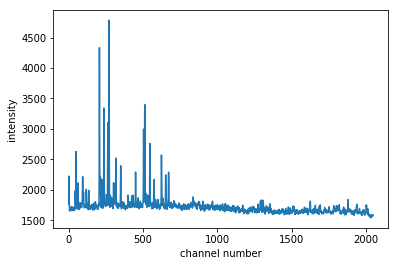

In [18]:
profile = np.array(df.iloc[0,:2048])
plt.plot(profile)
plt.xlabel('channel number')
plt.ylabel('intensity')

Original spectrum where x is the channel number. I will convert this to wavelength using the calibration defined at the top of the notebook.

In [35]:
def calibSpectrum(arr, coefs=[1,1,1,1]):
        """
        arr = spectrum of length 2048
        coefs = coefficients to use in our calibration function
        
        returns calibrated array
        """
        calib = arr
        #calib = coefs[0] + coefs[1]*calib + coefs[2]*(calib**2) + coefs[3]*(calib**3)
        calib = calib+100
        return calib

In [69]:
def addRow(df, spec, params):
        """
        df = DataFrame we want to append a row to
        params = value for each column of row
        
        returns input df with one new row
        """
        row = np.append(spec, params)
        df.loc[len(df)] = row
        return df

In [85]:
# Empty dataframe
cal_df = pd.DataFrame(columns=np.append(np.array(df.columns), ['Calibration1', 'Calibration2',\
                                                               'Calibration3', 'Calibration4',\
                                                               'Type']))
import time

times = []
for index, row in df.iterrows():
    start = time.time()
    coeffs = [1,1,1,1]
    addRow(cal_df, np.array(row[:2054]), np.array([coeffs[0], coeffs[1], coeffs[2], coeffs[3], 'int']))
    end = time.time()
    times.append(end-start)
cal_df

,1,2,3,4,5,6,7,8,9,10,...,FileName,Element,Energy,Current,Date,Calibration1,Calibration2,Calibration3,Calibration4,Type
0,1764.0,2224.0,2135.0,1864.0,1794.0,1727.0,1652.0,1676.0,1693.0,1698.0,...,EUV067_Ar_60mA_3p398kV_60s_1D15_5scook_2p44e-5...,18,3398.0,60.0,11-18-2015,1,1,1,1,int
1,1190.0,1781.0,1742.0,1476.0,1348.0,1278.0,5191.0,1599.0,1187.0,1161.0,...,EUV074_Ar_14p983k_140p1mA_5scook_60s_1D10_1p20...,18,14983.0,140.1,11-19-2015,1,1,1,1,int
2,667.0,803.0,788.0,734.0,732.0,677.0,679.0,671.0,665.0,671.0,...,EUV004_Ar_60mA_3p323kV_30s_1D6_5scook_2p59e-5t...,18,3323.0,60.0,11-19-2015,1,1,1,1,int
3,15369.0,16546.0,16678.0,16525.0,16585.0,16457.0,16479.0,16742.0,16759.0,16748.0,...,EUV001_150mA_3p98KV_60s_1D5_5scook_4p29e-6torr...,0,3980.0,150.0,11-17-2015,1,1,1,1,int
4,671.0,837.0,817.0,721.0,702.0,699.0,674.0,674.0,661.0,675.0,...,EUV006_Ar_60mA_3p353kV_30s_1D6_5scook_2p62e-5t...,18,3353.0,60.0,11-19-2015,1,1,1,1,int
5,724.0,849.0,806.0,718.0,691.0,683.0,694.0,689.0,668.0,661.0,...,EUV022_Ar_60mA_2p29KV_30s_1D6_5scook_2p32e-5to...,18,2290.0,60.0,11-17-2015,1,1,1,1,int
6,673.0,787.0,738.0,728.0,700.0,698.0,661.0,666.0,671.0,664.0,...,EUV051_Ar_60mA_2p935kV_30s_1D6_5scook_2p30e-5t...,18,2935.0,60.0,11-17-2015,1,1,1,1,int
7,514.0,596.0,599.0,585.0,564.0,558.0,556.0,579.0,569.0,546.0,...,EUV057_Ar_60mA_4p200kV_30s_1D6_5scook_2p66e-5t...,18,42000.0,60.0,11-19-2015,1,1,1,1,int
8,628.0,779.0,763.0,717.0,691.0,673.0,661.0,663.0,659.0,676.0,...,EUV021_Ar_60mA_3p579kV_30s_1D6_5scook_2p56e-5t...,18,3579.0,60.0,11-19-2015,1,1,1,1,int
9,614.0,711.0,728.0,695.0,676.0,659.0,662.0,653.0,658.0,645.0,...,EUV066_Ar_4p80k_60mA_5scook_30s_1D6_2p28e-5tor...,18,4800.0,60.0,11-19-2015,1,1,1,1,int


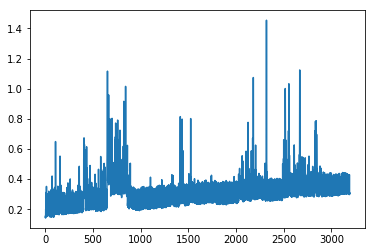

In [86]:
plt.plot(times)